# MONTE-CARLO SIMULATION 
## ESSEC Executive MS in Financial Management and Management Control 2023 by L.J. Gessay
This program is a part of my CFO journey and my thesis work on M&A for my ESSEC Executive MS in Financial Management and Management Control graduation. It provides a value range of the target using Montecarlo simulation and DCF. The program takes as inputs the financial statements, assumptions and scenarios of the target company and outputs a valuation report with sensitivity analysis and charts. The program is written in Python and uses pandas, numpy and matplotlib libraries. The program is intended for educational purposes only and does not constitute professional advice or recommendation.
Forked from johnnyp2587/simple-dcf, then addition of few parameters, statistics  and output reporting!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
%matplotlib inline

In [2]:
# Key inputs from DCF model
target = 'M&A deal code name - L.J. Gessay Thesis Exec Master DFC 23'
crcy = '$'
years = 5
starting_sales = 6.6 #millions
capex_percent = depr_percent = 0.03
sales_growth = 0.025
ebitda_margin = 0.14
nwc_percent = 0.20
tax_rate = 0.25
nb_stock = 1.342277 #millions
net_debt = -0.332

In [3]:
# DCF assumptions
r = 0.20
g = 0.015

In [4]:
# For MCS model
iterations = 10000000
sales_std_dev = 0.05
ebitda_std_dev = 0.01
nwc_std_dev = 0.005

In [5]:
def run_mcs():
    
    
    # Generate probability distributions
    sales_growth_dist = np.random.normal(loc=sales_growth, 
                                         scale=sales_std_dev, 
                                         size=(years, iterations))
    ebitda_margin_dist = np.random.normal(loc=ebitda_margin, 
                                          scale=ebitda_std_dev, 
                                          size=(years, iterations))
    nwc_percent_dist = np.random.normal(loc=nwc_percent, 
                                        scale=nwc_std_dev, 
                                        size=(years, iterations))
    
    # Calculate free cash flow
    sales_growth_dist += 1
    for i in range(1, len(sales_growth_dist)):
        sales_growth_dist[i] *= sales_growth_dist[i-1]
    sales = sales_growth_dist * starting_sales
    ebitda = sales * ebitda_margin_dist
    ebit = ebitda - (sales * depr_percent)
    tax = -(ebit * tax_rate)
    np.clip(tax, a_min=None, a_max=0)
    nwc = nwc_percent_dist * sales
    starting_nwc = starting_sales * nwc_percent
    prev_year_nwc = np.roll(nwc, 1, axis=0)
    prev_year_nwc[0] = starting_nwc
    delta_nwc = prev_year_nwc - nwc
    capex = -(sales * capex_percent)
    free_cash_flow = ebitda + tax + delta_nwc + capex
    # Discount cash flows to get DCF value
    terminal_value = free_cash_flow[-1] * (1 + g) / (r - g)
    discount_rates = [(1 / (1 + r)) ** i for i in range (1,years+1)]
    dcf_value = sum((free_cash_flow.T * discount_rates).T) 
    dcf_value += terminal_value * discount_rates[-1]
    total_free_cash_flow = sum((free_cash_flow))
    print((dcf_value))  
    return   dcf_value


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.72 µs
[3.05551788 2.98177532 2.83173575 ... 2.46368454 2.74181708 2.74492212]
<class 'numpy.ndarray'>


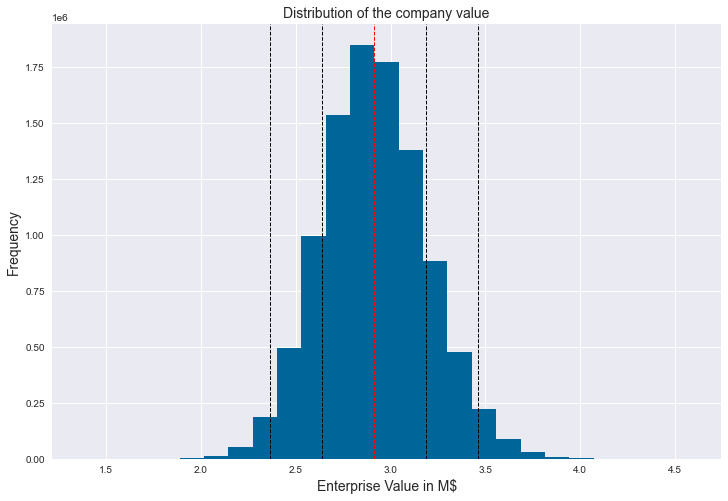

# *** M&A deal code name - L.J. Gessay Thesis Exec Master DFC 23 - Monte-Carlo simulation 10,000,000 scenarios ***

## Parameters
5 Years ; WACC :20.0% ; Sales growth : 2.5% ; Perpetual growth : 1.5% ;
Starting Sales : M$ 6.6 ; Ebitda margin : 14.0% ; Capex & Depreciation : 3.0% ;
Net working capital : 20.0% ; Tax rate : 25.0% ; Net debt : M$ -0.3;
Sales std dev : 5.0% ; Ebitda std dev : 1.0% ; NWC std dev : 0.5%

## Enterprise Value 
	Average case : M$ 2.91  equ. x3.2 Ebitda - Standard deviation: M$ 0.27
	Worst case: M$ 1.38  equ. x1.5 Ebitda - Best case: M$ 4.58 equ. x5.0 Ebitda
	68% value range: M$ 2.64 equ. x2.9 Ebitda and M$ 3.19 equ. x3.5 Ebitda
	95% value range: M$ 2.37 equ. x2.6 Ebitda and M$ 3.46 equ. x3.7 Ebitda

## Equity Value 
	Average case: M$ 3.25 - Standard deviation: M$ 0.27
	Worst case: M$ 1.71 - Best case: M$ 4.91
	68% value range: M$ 2.97 and M$ 3.52
	95% value range: M$ 2.7 and M$ 3.79

Total number of shares :  1,342,277

##Equity Value per share 
	Average case : 

''

In [6]:
%time 
sims =run_mcs()
print(type(sims))

# Set up stat 
worst = sims.min()
avg = sims.mean()
best = sims.max()
std_dev = sims.std()

# Set up confidence intervals
upper68 = avg+std_dev
lower68 = avg-std_dev
upper95 = avg+std_dev*2
lower95 = avg-std_dev*2

# Draw the distribution of the results
font = font_manager.FontProperties(family='Arial', size=14)
plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(sims, bins=25, color='#006699')

# Add a title and axis labels
ax.set_title("Distribution of the company value", fontproperties=font)
ax.set_xlabel(f"Enterprise Value in M{crcy}", fontproperties=font)
ax.set_ylabel("Frequency", fontproperties=font);

# Plot the probability distribution
ax.axvline(avg, color = 'r', linestyle='dashed', linewidth=1)
ax.annotate(round(avg,1), xy = (avg-3, 14000), fontsize = 17, color = 'w')
ax.axvline(upper68, color = 'k', linestyle='dashed', linewidth=1)
ax.axvline(lower68, color = 'k', linestyle='dashed', linewidth=1)
ax.axvline(upper95, color = 'k', linestyle='dashed', linewidth=1)
ax.axvline(lower95, color = 'k', linestyle='dashed', linewidth=1)

# Show distribution 
plt.show()



# Print out confidence intervals
print(f"# *** {target} - Monte-Carlo simulation {round(iterations,0):,d} scenarios ***\n")

print(f"## Parameters\n{years} Years ; WACC :{r*100}% ; Sales growth : {sales_growth*100}% ; Perpetual growth : {g*100}% ;\n\
Starting Sales : M{crcy} {starting_sales} ; Ebitda margin : {round(ebitda_margin*100,2)}% ; Capex & Depreciation : {capex_percent*100}% ;\n\
Net working capital : {nwc_percent*100}% ; Tax rate : {tax_rate*100}% ; Net debt : M{crcy} {round(net_debt,1)};\n\
Sales std dev : {sales_std_dev*100}% ; Ebitda std dev : {ebitda_std_dev*100}% ; NWC std dev : {nwc_std_dev*100}%\n")

print(f"## Enterprise Value \n\tAverage case : M{crcy} {round(avg,2)}  equ. x{round(avg/(starting_sales*ebitda_margin),1)} Ebitda - Standard deviation: M{crcy} {round(std_dev,2)}")
print(f"\tWorst case: M{crcy} {round(worst,2)}  equ. x{round(worst/(starting_sales*ebitda_margin),1)} Ebitda - Best case: M{crcy} {round(best,2)} equ. x{round(best/(starting_sales*ebitda_margin),1)} Ebitda")
print(f"\t68% value range: M{crcy} {round(lower68,2)} equ. x{round(lower68/(starting_sales*ebitda_margin),1)} Ebitda and M{crcy} {round(upper68,2)} equ. x{round(upper68/(starting_sales*ebitda_margin),1)} Ebitda")
print(f"\t95% value range: M{crcy} {round(lower95,2)} equ. x{round(lower95/(starting_sales*ebitda_margin),1)} Ebitda and M{crcy} {round(upper95,2)} equ. x{round(upper95/(starting_sales*ebitda_margin),1)} Ebitda\n")

# Print out confidence intervals
print(f"## Equity Value \n\tAverage case: M{crcy} {round((avg-net_debt),2)} - Standard deviation: M{crcy} {round(std_dev,2)}")
print(f"\tWorst case: M{crcy} {round((worst-net_debt),2)} - Best case: M{crcy} {round((best-net_debt),2)}")
print(f"\t68% value range: M{crcy} {round((lower68-net_debt),2)} and M{crcy} {round((upper68-net_debt),2)}")
print(f"\t95% value range: M{crcy} {round((lower95-net_debt),2)} and M{crcy} {round((upper95-net_debt),2)}\n")

print(f"Total number of shares :  {round(nb_stock*1000000,0):,.0f}\n")
print(f"##Equity Value per share \n\tAverage case : {crcy} {round((avg-net_debt)/nb_stock,2)} - Standard deviation: {crcy} {round(std_dev/nb_stock,2)}")
print(f"\tWorst case: {crcy} {round((worst-net_debt)/nb_stock,2)} - Best case: {crcy} {round((best-net_debt)/nb_stock,2)}")
print(f"\t68% value range: {crcy} {round((lower68-net_debt)/nb_stock,2)} and {crcy} {round((upper68-net_debt)/nb_stock,2)}")
print(f"\t95% value range: {crcy} {round((lower95-net_debt)/nb_stock,2)} and {crcy} {round((upper95-net_debt)/nb_stock,2)}")
;